# Matplotlib Tips and Tricks

Welcome to this notebook on `matplotlib`! Before diving into deep learning, it's essential to have a good grasp of data visualization. This notebook will introduce you to the various features and functionalities of `matplotlib`, one of the most popular plotting libraries in Python.

## Handy links:
[Tips & Tricks PDF](https://matplotlib.org/cheatsheets/handout-tips.pdf)

[Guidelines](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure)

## Table of Contents

1. Dive into the Canvas: Understanding Parts of a Figure
2. The Many Ways to Plot: Types of Inputs
3. The Artist's Palette: Styling and Customization
4. Multiple Views: Working with Multiple Figures and Axes
5. Challenge

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Dive into the Canvas: Understanding Parts of a Figure

### 1.1 The Blank Canvas: Figure

The `Figure` is the top-level container in `matplotlib`. It is the blank canvas.

**Exercise**: Create an empty figure with a size of 8x6 inches

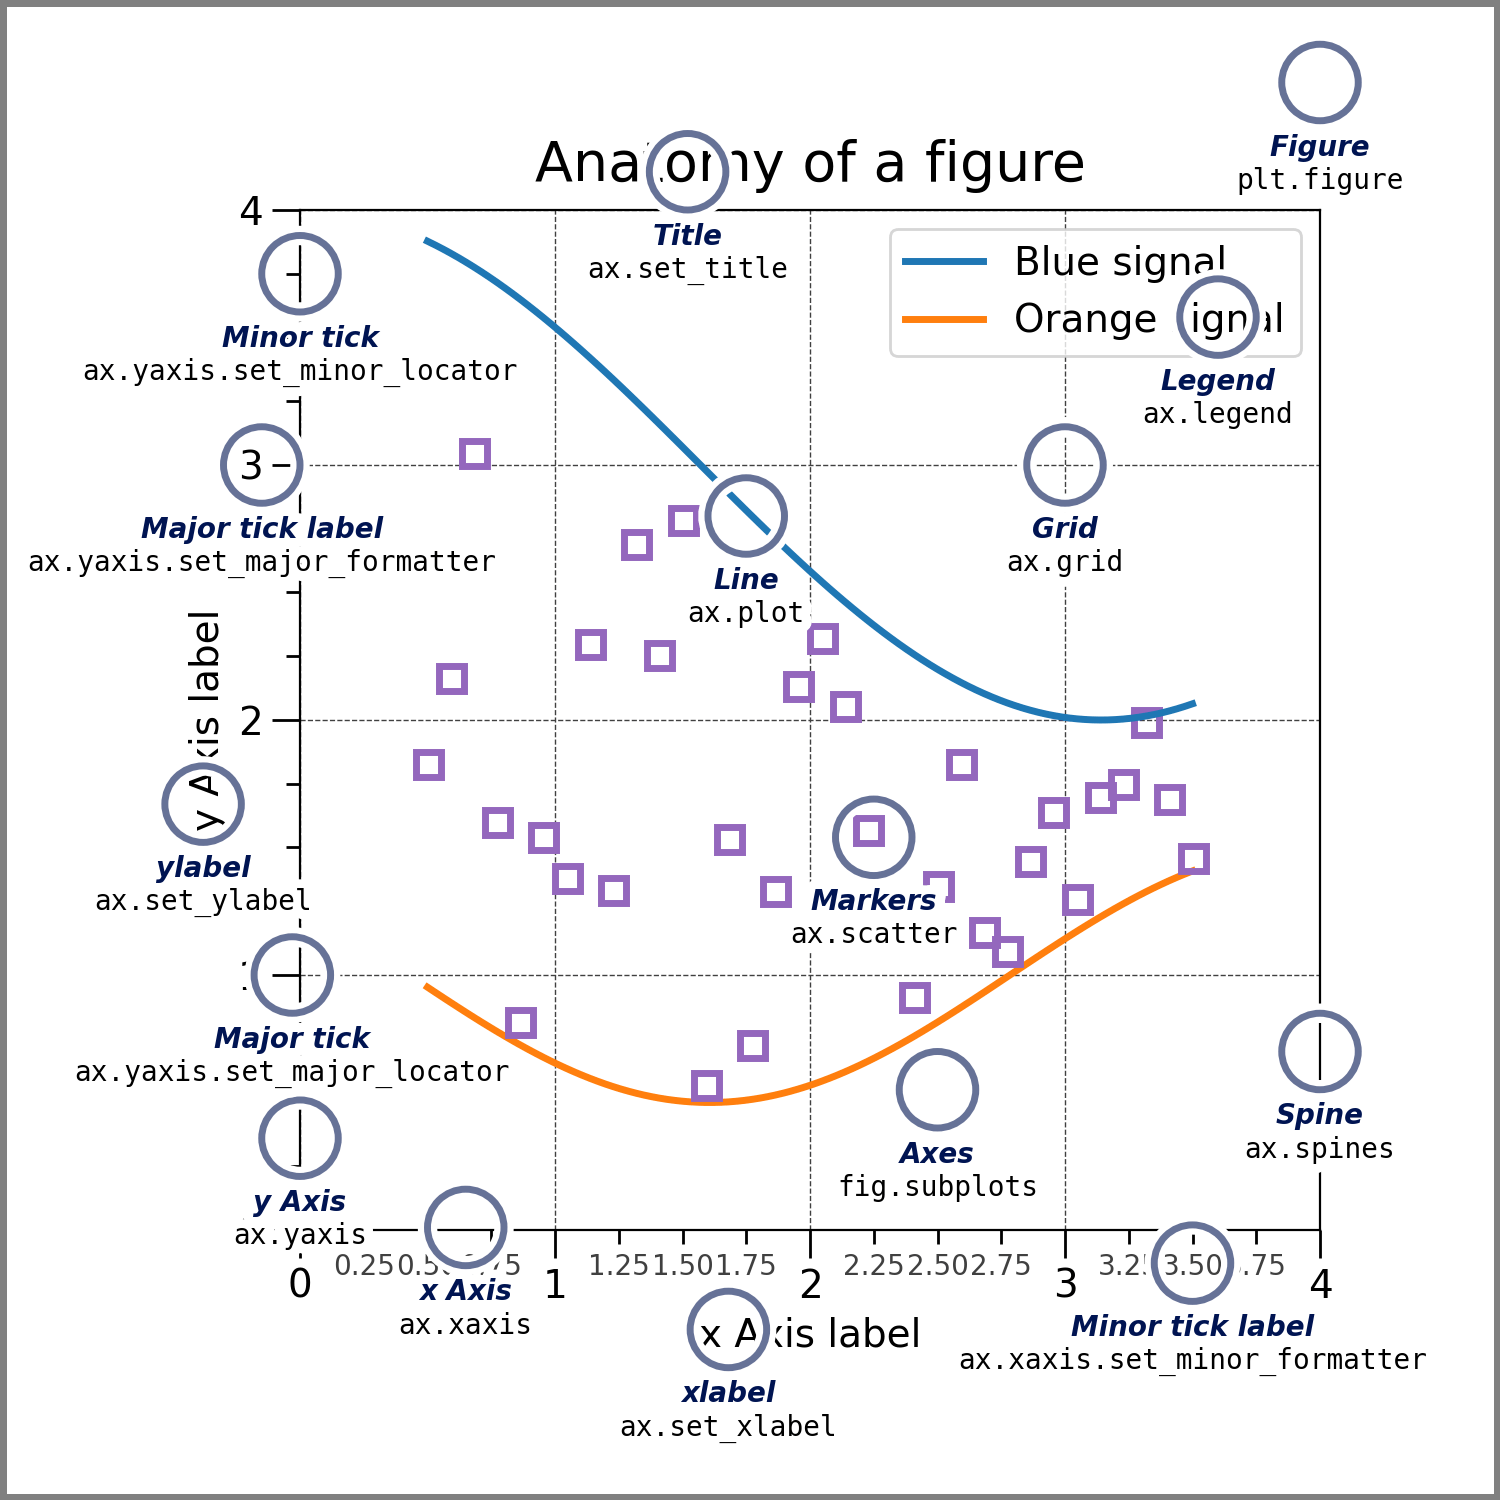


In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.show()

<Figure size 800x600 with 0 Axes>

### 1.2 The Stage: Axes

In matplotlib, the Axes object represents a single plot or graph within a figure. It contains most of the figure elements, including the x-axis, y-axis, plotted data, and labels. The position and size of an Axes object are defined by a list of four values: [left, bottom, width, height], where each value ranges from 0 to 1, representing the fraction of the figure's width or height.

**Exercise**: Create a figure of size 8x6 inches again. Add an Axes object to this figure, positioned at [0.1, 0.1, 0.8, 0.8].

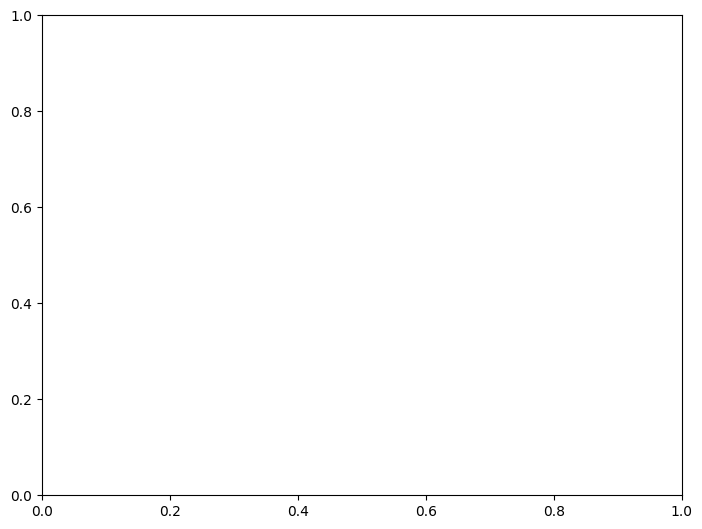

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.show()

**Exercise**: Given the Axes object you created in the previous exercise, how would you adjust its position and size such that its width and height are reduced by half, while keeping its bottom-left corner anchored at the same position?

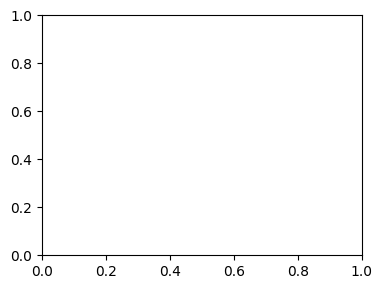

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.4, 0.4])
plt.show()

###1.3 The Guidelines: Axis

The `Axis` defines the limits of the data space.

**Question**: What's the difference between Axes and Axis?

**Answer**: Axes refers to the plotting area, including all parts of the plot and the plot itself. On the other hand, Axis are the number-line-like objects and handle the drawing of the tick lines, the grid lines, and the labels.

**Exercise**: Try Changing the font of the axis.

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
font-manager is already the newest version (0.8.8-1).
The following package was automatically installed and is no longer required:
  libfuse2
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


You can see available fonts here:

In [ ]:
#clear the matplotlib font cache (this is important!!!)
!rm -fr ~/.cache/matplotlib

#originally from: http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
HTML("<div style='column-count: 2;'>{}</div>".format(code))


In [ ]:
for tick in ax.get_xticklabels(which='both'):
    tick.set_fontname("Liberation Mono")

for tick in ax.get_yticklabels(which='both'):
    tick.set_fontname("Liberation Mono")

plt.show()

###1.4 The Star: Artist

Everything you see on a figure is an `Artist`, from `Text` to `Line2D` to `Collection` objects.

**Exercise**: On the main axes, draw a blue star at position (0.5, 0.5).

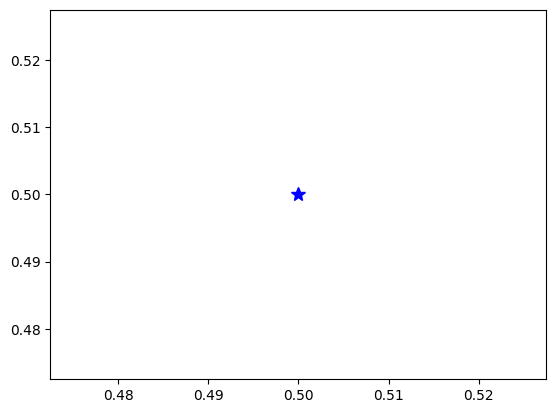

In [ ]:
fig, ax = plt.subplots()
ax.plot(0.5, 0.5, marker='*', markersize=10, color='blue')
plt.show()

# 2. The Many Ways to Plot: Types of Inputs
###2.1 Lists and Arrays

**Exercise**: Plot a simple line using a list of integers from 1 to 10.

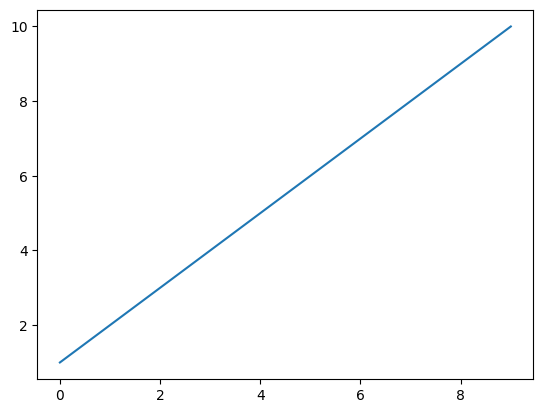

In [ ]:
x = list(range(1, 11))
plt.plot(x)
plt.show()

###2.2 DataFrames and Series

*Hint*: You can import other packages

**Exercise**: Create a DataFrame with two columns 'A' and 'B' filled with random numbers and plot them.

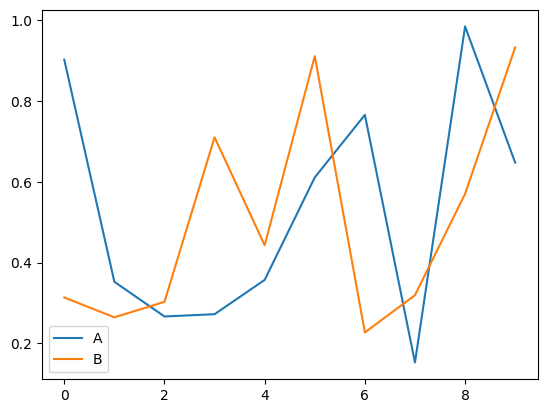

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10)
})

df.plot()
plt.show()

# 3. The Artist's Palette: Styling and Customization

###3.1 Styling Artists

**Challenge**: Create a scatter plot with 50 points, where each point's color is determined by its distance from the origin.

In [ ]:
x = np.random.rand(50)
y = np.random.rand(50)

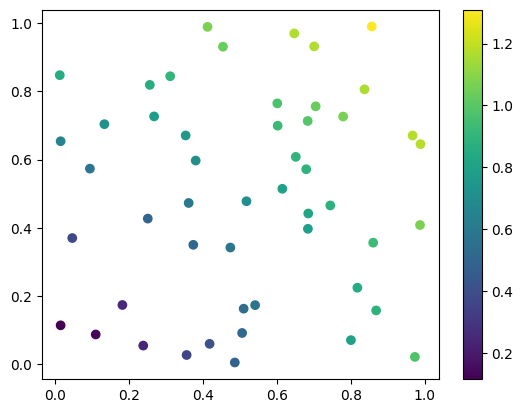

In [ ]:
colors = np.sqrt(x**2 + y**2)
plt.scatter(x, y, c=colors)
plt.colorbar()
plt.show()

### 3.2 Labelling Plots

**Exercise**: Add a title, x-axis label, y-axis label, and legend to your previous plot.


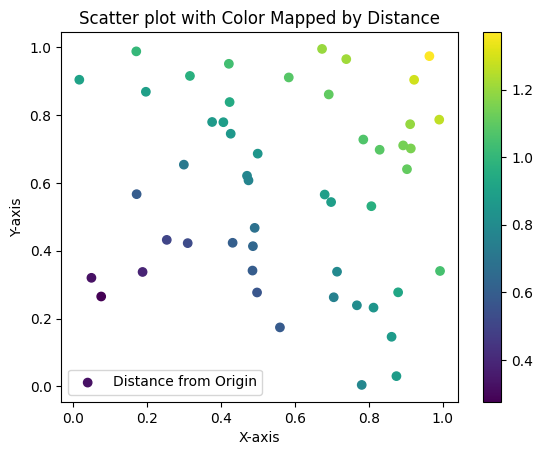

In [ ]:
plt.scatter(x, y, c=colors, label='Distance from Origin')
plt.colorbar()
plt.title('Scatter plot with Color Mapped by Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

**Question**: When would you use a scatter plot instead of a line plot?


**Answer**: When interested in the relationship between two variables without assuming any order, a scatter plot is a good choice. If you're looking at data over a continuous interval or want to see the trend of a variable over time, a line plot is more appropriate.

###3.4 Axis Scales and Ticks

**Exercise**: Plot the exponential function and set the y-axis to a logarithmic scale.

In [ ]:
x = np.linspace(0, 2, 100)
y = np.exp(x)

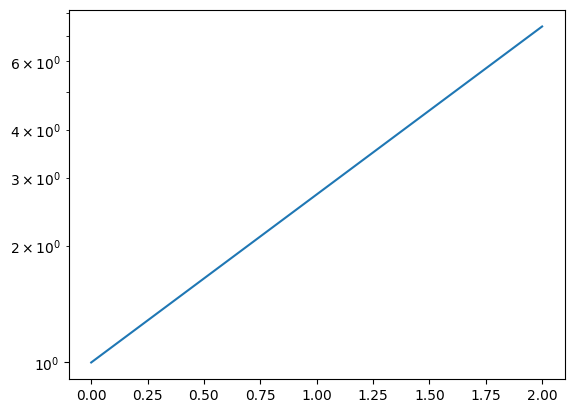

In [ ]:
plt.plot(x, y)
plt.yscale('log')
plt.show()

# 4. Multiple Views: Working with Multiple Figures and Axes

**Exercise**: Create a figure with 4 subplots: two rows and two columns. In each subplot, plot one of the following: a line, a scatter plot, a bar plot, and a histogram.


In [ ]:
#line plot data
line_x = np.linspace(0, 10, 100)
line_y = np.sin(np.linspace(0, 10, 100))

#scatter plot data
scatter_x = np.random.rand(50)
scatter_y = np.random.rand(50)

#bar plot data
categories = ['A', 'B', 'C']
values = [10, 30, 20]

#histogram data
data = np.random.randn(1000)

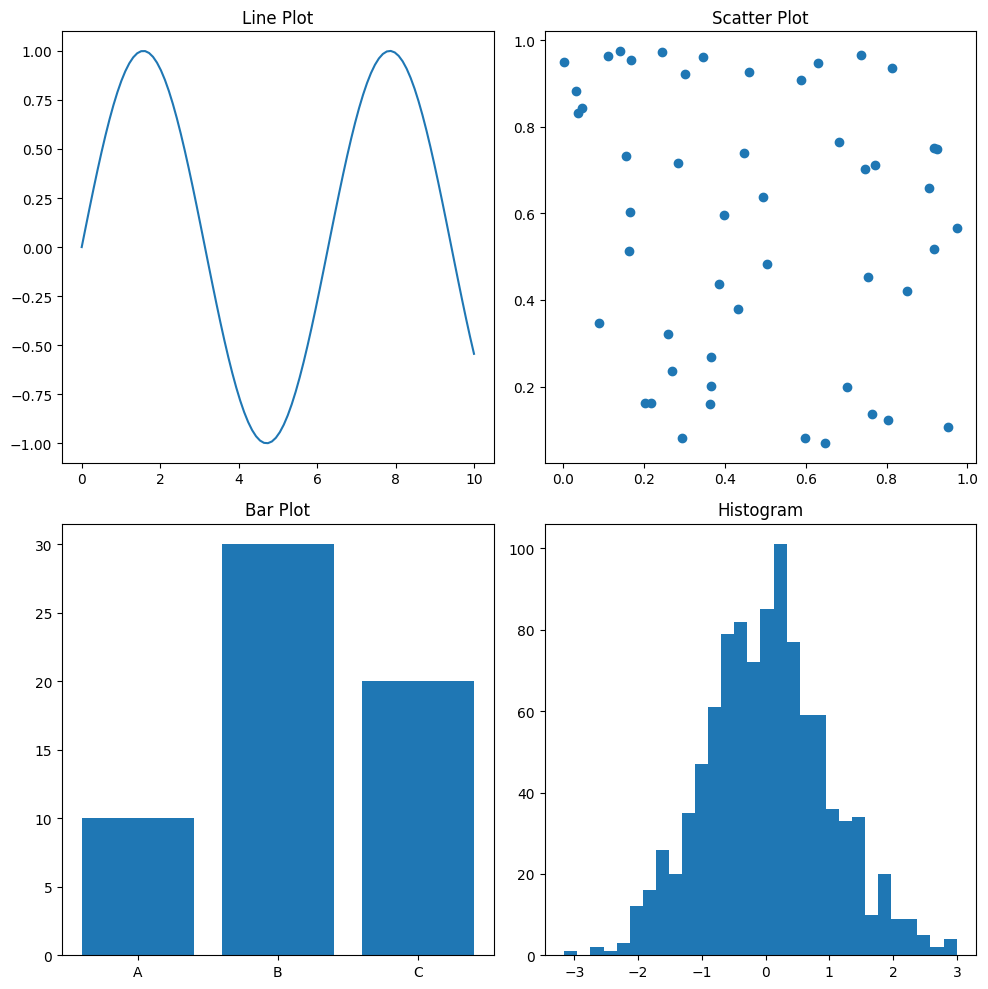

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#line plot
axs[0, 0].plot(line_x, line_y)
axs[0, 0].set_title('Line Plot')

#scatter plot
axs[0, 1].scatter(scatter_x, scatter_y)
axs[0, 1].set_title('Scatter Plot')

#bar plot
axs[1, 0].bar(categories, values)
axs[1, 0].set_title('Bar Plot')

#histogram
axs[1, 1].hist(data, bins=30)
axs[1, 1].set_title('Histogram')

plt.tight_layout()
plt.show()



# 5. Challenge
**Double Axes**: Create a plot where the sin and exponential function share an x axis, but have two different y axis.

In [ ]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.exp(x)

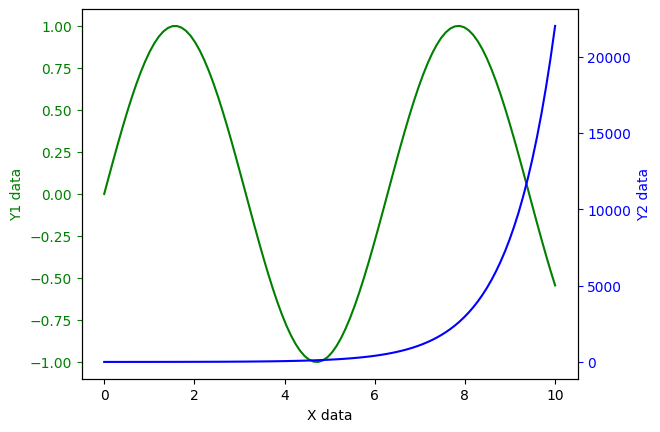

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()

ax2.plot(x, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')
ax2.tick_params('y', colors='b')

plt.show()
